In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from matplotlib.animation import FuncAnimation

In [7]:
def softmax(Z):
    e_Z = np.exp(Z)
    ans = e_Z / e_Z.sum(axis = 0)

    return  ans

In [31]:
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    ans = e_Z / e_Z.sum(axis = 0)

    return  ans

In [13]:
N = 10   #number of data points
d = 2   #data dimension
C = 3   #number of classes

X = np.random.randn(d, N)
y = np.random.randint(0, C, (N,))

print(X)
print(y)

[[-0.49523247  2.71558614 -2.17072885  0.00762058 -0.57890844 -0.87145399
   0.11935757  1.08254137  0.20903202  0.44487057]
 [ 0.54160957 -0.2210206  -0.16350322  0.25885501 -1.49654782  0.59263056
   0.78116758  0.59914831 -1.37534577 -0.07326528]]
[1 2 2 1 1 0 0 1 1 1]


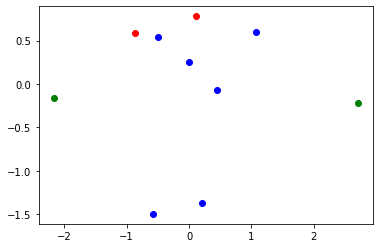

In [14]:
def show(index):
    xx = X[0, np.where(y == index)]
    yy = X[1, np.where(y == index)]
    
    if (index == 0):    plt.plot(xx, yy, 'ro')
    if (index == 1):    plt.plot(xx, yy, 'bo')
    if (index == 2):    plt.plot(xx, yy, 'go')

show(0)
show(1)
show(2)

X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In [19]:
def label_vector(y, nClass):
    N = y.shape[0]
    
    index = np.zeros((nClass, N))

    for i in range(N):
        index[y[i]][i] = 1
    
    return  index

Y = label_vector(y, C)
print(Y)

[[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 1. 1. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return  -np.sum(Y * np.log(A))

In [23]:
def grad(X, Y, W):
    A = softmax(W.T.dot(X))
    E = A - Y

    return  X.dot(E.T)

In [29]:
def softmax_Regression(X, y, W_init, eta, tol = 1e-4, maxcount = 10000):
    W = [W_init]
    nClass = W_init.shape[1]
    nPoint = X.shape[1]
    nDim   = X.shape[0]
    
    global Y
    
    for Iter in range(1, maxcount + 1):
        mix_id = np.random.permutation(nPoint)
        for i in mix_id:
            xi = X[:, i].reshape(nDim  , 1)
            yi = Y[:, i].reshape(nClass, 1)
            
            ai = softmax(np.dot(W[-1].T, xi))
            
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            # stopping criteria
            
            if (Iter % 20 == 0):               
                if np.linalg.norm(W_new - W[-20]) < tol:
                    return W
            
            W.append(W_new)
    
    return  W

W_init = np.random.randn(d + 1, C)

W = softmax_Regression(X, y, W_init, 0.05)[-1]

print(W)

[[-12.31766923   6.76048757   5.72575103]
 [ -2.69529011   2.04536907   2.16935941]
 [ 19.39334001  -9.56533912  -9.45124057]]


In [36]:
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    A = softmax_stable(W.T.dot(X))
    
    return  np.argmax(A, axis = 0)

print(pred(W, np.array([[0.5, 0]]).T))

[1]
